### Using the data on student grades from this lesson, complete the following:

In [1]:
import pandas as pd
import numpy as np

In [2]:
def wrangle_grades():
    grades = pd.read_csv("student_grades_copy.csv")
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    df.drop(columns = ["Unnamed: 0"], inplace = True)
    return df

In [3]:
grades = wrangle_grades()

In [4]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
student_id     102 non-null int64
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(5)
memory usage: 4.8 KB


In [5]:
import split_scale

In [6]:
train, test = split_scale.split_my_df(grades)

predictions = pd.DataFrame({
    "actual": train.final_grade
})

Create a model that uses exam 1 to predict the final grade.

In [7]:
import sklearn.linear_model

X = train[["exam1"]]
y = train.final_grade

lm = sklearn.linear_model.LinearRegression()

lm.fit(X,y)

predictions["exam1_lm"] = lm.predict(X)

In [8]:
predictions.head()

,actual,exam1_lm
86,77,75.341560
21,77,75.341560
31,81,82.203999
33,76,77.629040
102,65,65.429150


Create a model that uses exam 2 to predict the final grade.

In [9]:
X = train[["exam2"]]

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions["exam2_lm"] = lm.predict(X)
predictions["baseline"] = train.final_grade.mean()

Compare your models in the following manner:

In [10]:
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual        0.000000
exam1_lm      3.405933
exam2_lm     16.067423
baseline    107.971041
dtype: float64

Visualize the residuals. Create a seperate visualization for each model.

In [11]:
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns

residuals = predictions[["actual", "exam1_lm"]]

residuals["residual"] = residuals.exam1_lm - residuals.actual
 
sns.scatterplot(x = residuals.exam1_lm, y = residuals.residual, data=residuals)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


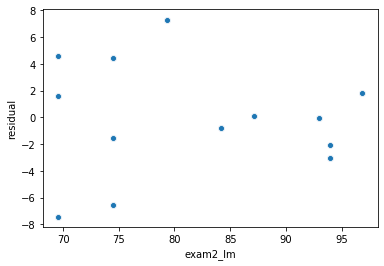

In [12]:
residuals = predictions[["actual", "exam2_lm"]]

residuals["residual"] = residuals.exam2_lm - residuals.actual
 
sns.scatterplot(x = residuals.exam2_lm, y = residuals.residual, data=residuals)

Visualize the actual vs the predicted values. Create a seperate visualization for each model.

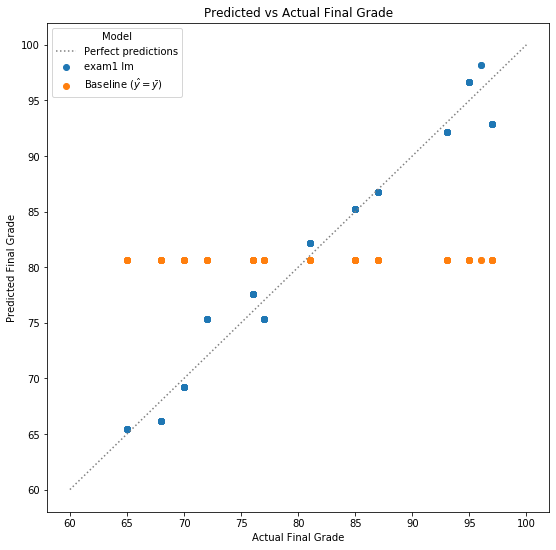

In [13]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.exam1_lm, label="exam1 lm", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')

plt.show()

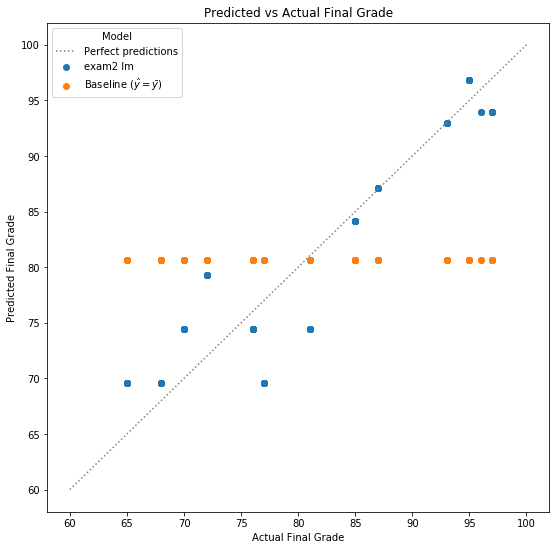

In [14]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.exam2_lm, label="exam2 lm", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')

plt.show()

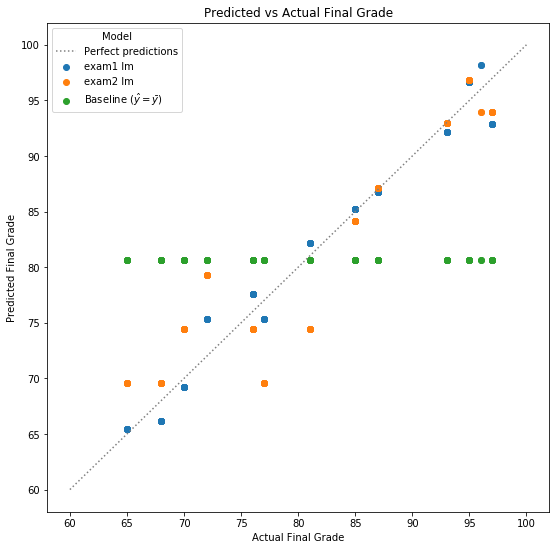

In [15]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.exam1_lm, label="exam1 lm", marker='o')
plt.scatter(predictions.actual, predictions.exam2_lm, label="exam2 lm", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')

plt.show()

### Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [16]:
X = train[["exam1", "exam3"]]

lm.fit(X, y)

predictions["exam1_exam2_lm"] = lm.predict(X)

predictions.head()

,actual,exam1_lm,exam2_lm,baseline,exam1_exam2_lm
86,77,75.341560,69.572030,80.679012,75.055828
21,77,75.341560,69.572030,80.679012,75.055828
31,81,82.203999,74.445625,80.679012,82.355741
33,76,77.629040,74.445625,80.679012,76.103539
102,65,65.429150,69.572030,80.679012,66.358968


In [17]:
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual              0.000000
exam1_lm            3.405933
exam2_lm           16.067423
baseline          107.971041
exam1_exam2_lm      2.861172
dtype: float64

### Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [18]:
X_test = test[["exam1", "exam2"]]
y_test = test["final_grade"]

lm.fit(X_test, y_test)

test_predictions = lm.predict(X_test)
test_actual = y_test

In [19]:
mse = sklearn.metrics.mean_squared_error(test_actual, test_predictions)

In [20]:
import math

rmse = math.sqrt(mse)
rmse

2.1241318444999586

In [21]:
predictions[["actual", "exam1_exam2_lm"]]

,actual,exam1_exam2_lm
86,77,75.055828
21,77,75.055828
31,81,82.355741
33,76,76.103539
102,65,66.358968
...,...,...
85,76,76.103539
19,93,92.611393
100,70,70.443342
94,85,85.051682


# Telco_churn Exercises

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

In [22]:
import wrangle
import explore
import split_scale
import evaluate

## Wrangle

In [23]:
customers = wrangle.wrangle_telco()

In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1694
Data columns (total 7 columns):
customer_id             1685 non-null object
monthly_charges         1685 non-null float64
tenure                  1685 non-null int64
total_charges           1685 non-null float64
tenure_years            1685 non-null float64
tenure_years_bins       1685 non-null category
monthly_charges_bins    1685 non-null category
dtypes: category(2), float64(3), int64(1), object(1)
memory usage: 82.5+ KB


In [25]:
customers = customers.drop(columns= ["customer_id", "tenure_years_bins", "monthly_charges_bins"])

In [26]:
customers.head()

,monthly_charges,tenure,total_charges,tenure_years
0,109.70,71,7904.25,5.0
1,84.65,63,5377.80,4.0
2,90.45,65,5957.90,4.0
3,45.20,54,2460.55,3.0
4,116.80,72,8456.75,5.0


## Split_scale

In [27]:
test, train = split_scale.split_my_df(customers)

In [28]:
test.shape

(1348, 4)

In [29]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler(train, test)

## Model

Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [30]:
import pandas as pd
import sklearn.linear_model

X = train_scaled[["tenure"]]
y = train[["total_charges"]]

lm = sklearn.linear_model.LinearRegression()

lm.fit(X,y)

predictions = pd.DataFrame({
    "actual": train.total_charges
})

predictions["simple_lm_tenure"] = lm.predict(X)

In [31]:
predictions.head()

,actual,simple_lm_tenure
305,1502.25,5051.123810
452,7567.20,4616.667542
917,7049.75,4269.102528
1421,1225.65,4355.993781
1557,587.40,880.343639


In [32]:
X = train_scaled[["monthly_charges"]]

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions["simple_lm_monthly_charges"] = lm.predict(X)

In [33]:
predictions.head()

,actual,simple_lm_tenure,simple_lm_monthly_charges
305,1502.25,5051.123810,862.999456
452,7567.20,4616.667542,7235.095242
917,7049.75,4269.102528,7087.722982
1421,1225.65,4355.993781,789.313326
1557,587.40,880.343639,1115.637615


In [34]:
X = train_scaled[["monthly_charges", "tenure"]]

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

predictions["tenure_and_monthly_charges"] = lm.predict(X)

predictions.head()

,actual,simple_lm_tenure,simple_lm_monthly_charges,tenure_and_monthly_charges
305,1502.25,5051.123810,862.999456,1859.384825
452,7567.20,4616.667542,7235.095242,7205.810102
917,7049.75,4269.102528,7087.722982,6917.225703
1421,1225.65,4355.993781,789.313326,1474.643543
1557,587.40,880.343639,1115.637615,155.709325


In [35]:
lm.coef_, lm.intercept_

(array([[6130.19087127, 2845.31414359]]), array([-1114.21432971]))

### Evaluate the models and your baseline.

In [36]:
predictions["baseline"] = train["total_charges"].mean()

In [37]:
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual                        0.000000e+00
simple_lm_tenure              3.936631e+06
simple_lm_monthly_charges     7.283096e+05
tenure_and_monthly_charges    2.600517e+05
baseline                      6.601142e+06
dtype: float64

In [38]:
train_mse = sklearn.metrics.mean_squared_error(predictions.actual, predictions.tenure_and_monthly_charges)

train_rmse = math.sqrt(train_mse)

train_mse, train_rmse

(260051.69845166107, 509.9526433421647)

We conclude that the multivariate model is the most accurate

### Select the model that performed the best, and apply it to your test data.

In [39]:
X_test = test_scaled[["monthly_charges", "tenure"]]
y_test = test.total_charges

lm.fit(X_test, y_test)

test_predictions = lm.predict(X_test)
test_actual = y_test

In [40]:
test_mse = sklearn.metrics.mean_squared_error(test_actual, test_predictions)

import math

test_rmse = math.sqrt(test_mse)
test_mse, test_rmse

(240622.98063575584, 490.53336342776504)

In [41]:
residuals = test_actual - test_predictions
residuals.mean()

-7.443620398597797e-13

This rmse seems too high... I might have screwed something up

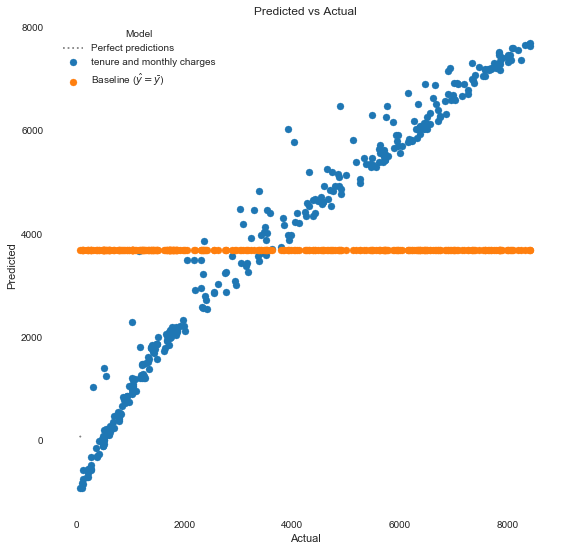

In [42]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.tenure_and_monthly_charges, label="tenure and monthly charges", marker='o')
plt.scatter(predictions.actual, predictions.baseline, label=r'Baseline ($\hat{y} = \bar{y}$)', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Predicted vs Actual')

plt.show()

In [46]:
import feature_engineering

X_train, y_train, X_test, y_test = split_scale.pull_X_y(train, test, "total_charges")


feature_engineering.rfe(X_train,y_train,2)

2 selected features
['monthly_charges', 'tenure_years']
